In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA







In [16]:
urltrain = "cs-training.csv"
train = pd.read_csv(urltrain)
train = train.drop(train.iloc[:,0:1],axis=1)
Y_train = train['SeriousDlqin2yrs']
X_train = train.drop(['SeriousDlqin2yrs'], axis = 1)

In [17]:
urltest = "cs-test.csv"
test = pd.read_csv(urltest)
test = test.drop(columns = {"SeriousDlqin2yrs"}, axis = 1)
X_test = test.drop(test.iloc[:,0:1],axis=1)

In [18]:
url_test_labels = "sampleEntry.csv"
label_proba = pd.read_csv(url_test_labels)
label_proba = label_proba.drop(label_proba.iloc[:, 0:1],axis = 1).values
Y_test = []
for i in label_proba:
  if(i > 0.5):
    Y_test.append(1)
  else:
    Y_test.append(0)

X_test['labels'] = Y_test

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

X_test = X_test.dropna()

Y_test = X_test['labels']
X_test = X_test.drop(['labels'], axis = 1)


sc = StandardScaler()
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

/Users/ashwinsheoran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [19]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

sc = StandardScaler()
sc = sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

AdaBoost Accuracy Score on training set :- 0.9365714285714286
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     68646
           1       0.55      0.22      0.31      4854

    accuracy                           0.94     73500
   macro avg       0.75      0.60      0.64     73500
weighted avg       0.92      0.94      0.92     73500



<AxesSubplot:>

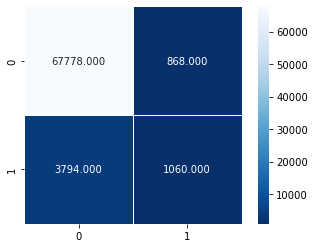

In [20]:
pred = clf.predict(X_train)
score = clf.score(X_train, y_train)
cm = confusion_matrix(y_train,pred)
print("AdaBoost Accuracy Score on training set :- " + str(score))
print(classification_report(y_train,pred))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

AdaBoost Accuracy Score on Validation set :- 0.9356825396825397
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29363
           1       0.57      0.21      0.31      2137

    accuracy                           0.94     31500
   macro avg       0.76      0.60      0.64     31500
weighted avg       0.92      0.94      0.92     31500



<AxesSubplot:>

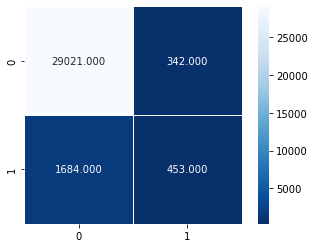

In [21]:
pred = clf.predict(X_valid)
score = clf.score(X_valid, y_valid)
cm = confusion_matrix(y_valid,pred)
print("AdaBoost Accuracy Score on Validation set :- " + str(score))
print(classification_report(y_valid,pred))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

AdaBoost Accuracy Score on testing set :- 0.9863267813267813
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     80040
           1       0.56      0.88      0.68      1360

    accuracy                           0.99     81400
   macro avg       0.78      0.94      0.84     81400
weighted avg       0.99      0.99      0.99     81400



<AxesSubplot:>

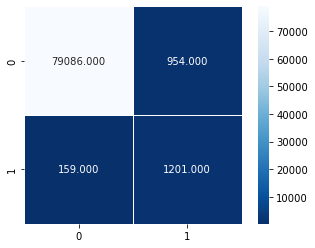

In [22]:
pred1 = clf.predict(X_test)
score = clf.score(X_test, Y_test)
cm = confusion_matrix(Y_test,pred1)
print("AdaBoost Accuracy Score on testing set :- " + str(score))
print(classification_report(Y_test,pred1))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [23]:
test_loss =[]

iteration=[]
for i in range (1,11):
    iteration.append(i*25)
    clf = AdaBoostClassifier(n_estimators=(i*25), random_state=0)
    clf.fit(X_train, y_train)
    pred2 = clf.predict(X_test)
    score = clf.score(X_test, Y_test)
    cm = confusion_matrix(Y_test,pred2)
    # print("AdaBoost Accuracy Score on testing set :- " + str(score))
    # print(classification_report(y_test,pred1))
    # sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    test_loss.append(log_loss(Y_test , pred2))




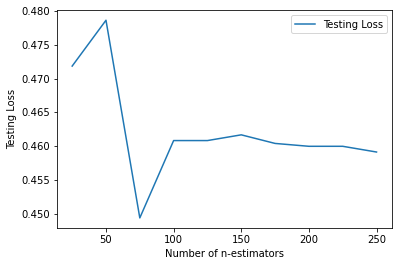

In [24]:
plt.plot(iteration,test_loss,label = "Testing Loss")
plt.xlabel("Number of n-estimators")
plt.ylabel("Testing Loss")
plt.legend()
plt.show()

Accuracy Score For Test (max depth = 1) : 0.9221498771498772
Precision Score For Test (max depth = 1) : 0.9221498771498772
Recall Score For Test (max depth = 1) : 0.9221498771498772

Accuracy Score For Test (max depth = 2) : 0.9100982800982801
Precision Score For Test (max depth = 2) : 0.9100982800982801
Recall Score For Test (max depth = 2) : 0.9100982800982801

Accuracy Score For Test (max depth = 3) : 0.9171621621621622
Precision Score For Test (max depth = 3) : 0.9171621621621622
Recall Score For Test (max depth = 3) : 0.9171621621621622

Accuracy Score For Test (max depth = 4) : 0.9117076167076167
Precision Score For Test (max depth = 4) : 0.9117076167076167
Recall Score For Test (max depth = 4) : 0.9117076167076167

Accuracy Score For Test (max depth = 5) : 0.8945700245700245
Precision Score For Test (max depth = 5) : 0.8945700245700245
Recall Score For Test (max depth = 5) : 0.8945700245700245

Accuracy Score For Test (max depth = 6) : 0.9266584766584767
Precision Score For Test

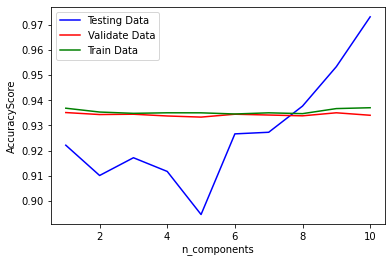

In [25]:
arr = [1,2,3,4,5,6,7,8,9,10]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
    clf = PCA(n_components = i)
    X_train2 = clf.fit_transform(X_train)
    X_valid2 = clf.fit_transform(X_valid)
    X_test2 = clf.fit_transform(X_test)
    clf = AdaBoostClassifier(n_estimators=(75), random_state=0)
    clf.fit(X_train2, y_train)
    pred_test = clf.predict(X_test2)
    pred_val = clf.predict(X_valid2)
    pred_train = clf.predict(X_train2)
    score = clf.score(X_test2, Y_test)
    accuracy_score_test = accuracy_score(Y_test,pred_test)
    recall_score_test = recall_score(Y_test,pred_test,average = "micro")
    precision_score_test = precision_score(Y_test,pred_test,average = "micro")
    test_plot.append(accuracy_score_test)

    recall_score_validate = recall_score(y_valid, pred_val, average = "micro")
    precision_score_validate = precision_score(y_valid, pred_val, average = "micro")
    accuracy_score_validate = accuracy_score(y_valid, pred_val)
    validate_plot.append(accuracy_score_validate)

    recall_score_train = recall_score(y_train, pred_train, average = "micro")
    precision_score_train = precision_score(y_train, pred_train, average = "micro")
    accuracy_score_train = accuracy_score(y_train, pred_train)
    train_plot.append(accuracy_score_train)
    print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
    print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
    print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
    print()
plt.xlabel("n_components")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()
